In [455]:
###### import requests, bs4
from bs4 import BeautifulSoup as bs
import pandas as pd
from urllib.request import Request, urlopen
import numpy as np
import time, os
import seaborn as sns

In [456]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

chromedriver = "C:/Program Files/Google/Chrome/Application/chromedriver" # path to the chromedriver executable
os.environ["webdriver.chrome.driver"] = chromedriver

In [457]:
#seattle
out_list = []
url_base = 'https://www.redfin.com/city/16163/WA/Seattle/filter/property-type=house+condo+townhouse,include=sold-6mo,viewport=47.68283:47.59423:-122.25002:-122.45653/page-'
url_list = [url_base+str(i) for i in range(1,10)]

for url in url_list:
    #Load the page
    driver = webdriver.Chrome(chromedriver)
    driver.get(url)
    time.sleep(1)  #pause to be sure page has loaded

    #Click on table
    driver.find_element_by_xpath("/html/body[@class='customer-facing    photosMode route-SearchPage']/div[@id='content']/div[9]/div[@id='right-container']/div[@id='results-display']/div[@class='WideSidepaneHeader--container']/div[@id='sidepane-header']/div[@class='stickExposedFilterAndDescription hideOnScroll']/div[@class='ModeToggler displayModeToggler']/button[@class='ModeOption button-text']/span[@class='modeOptionInnard table']").click()
    time.sleep(1)    
    page_source = driver.page_source
    soup = bs(page_source,'lxml')

    #Extract table
    homes=soup.find('div',class_='ReactDataTable subrow tableBody')
    try:
        table = homes.find('table')
    except:
        continue
    table_body = table.find('tbody')
    rows = table_body.find_all('tr')
    #Parse table
    for row in rows:
        address = row.find('td',class_='column column_1 col_address').text.split("Listed")[0]
        location = row.find('td',class_='column column_2 col_location').text
        price = row.find('td',class_='column column_3 col_price').text.split('$')[1].replace(',','')
        beds = row.find('td',class_='column column_4 col_beds').text
        baths = row.find('td',class_='column column_5 col_baths').text
        sqft = row.find('td',class_='column column_6 col_sqft').text.replace(',','')
        ppsqft = row.find('td',class_='column column_7 col_ppsqft').text.split('$')[1].replace(',','')
        on_redin_day = row.find('td',class_='column column_8 col_days').text.split(' days')[0]
        try:
            list_com =row.find_all('span')[0].text.split(': ')[1]
        except:
            list_com= np.nan
        try:
            sold_com=row.find_all('span')[1].text.split(': ')[1]
        except:
            sold_com= np.nan
        region = 'SEATTLE'
        out_list.append({'address':address,'location':location,'price':price,'beds':beds,'baths':baths,'sqft':sqft,'ppsqft':ppsqft,'on_redin_day':on_redin_day,'list_com': list_com,'buy_com':sold_com,'region':region})

#print(out_list) #check if works

In [458]:
#Bellevue
url_base = 'https://www.redfin.com/city/1387/WA/Bellevue/filter/property-type=house+condo+townhouse,include=sold-6mo,viewport=47.63544:47.57915:-122.13229:-122.22899/page-'
url_list = [url_base+str(i) for i in range(1,10)]

for url in url_list:
    #Load the page
    driver = webdriver.Chrome(chromedriver)
    driver.get(url)
    time.sleep(1)  #pause to be sure page has loaded

    #Click on table
    driver.find_element_by_xpath("/html/body[@class='customer-facing    photosMode route-SearchPage']/div[@id='content']/div[9]/div[@id='right-container']/div[@id='results-display']/div[@class='WideSidepaneHeader--container']/div[@id='sidepane-header']/div[@class='stickExposedFilterAndDescription hideOnScroll']/div[@class='ModeToggler displayModeToggler']/button[@class='ModeOption button-text']/span[@class='modeOptionInnard table']").click()
    time.sleep(1)    
    page_source = driver.page_source
    soup = bs(page_source,'lxml')

    #Extract table
    homes=soup.find('div',class_='ReactDataTable subrow tableBody')
    try:
        table = homes.find('table')
    except:
        continue
    table_body = table.find('tbody')
    rows = table_body.find_all('tr')
    #Parse table
    for row in rows:
        address = row.find('td',class_='column column_1 col_address').text.split("Listed")[0]
        location = row.find('td',class_='column column_2 col_location').text
        price = row.find('td',class_='column column_3 col_price').text.split('$')[1].replace(',','')
        beds = row.find('td',class_='column column_4 col_beds').text
        baths = row.find('td',class_='column column_5 col_baths').text
        sqft = row.find('td',class_='column column_6 col_sqft').text.replace(',','')
        try:
            ppsqft = row.find('td',class_='column column_7 col_ppsqft').text.split('$')[1].replace(',','')
        except:
            ppsqft= np.nan
        on_redin_day = row.find('td',class_='column column_8 col_days').text.split(' days')[0]
        try:
            list_com =row.find_all('span')[0].text.split(': ')[1]
        except:
            list_com= np.nan
        try:
            sold_com=row.find_all('span')[1].text.split(': ')[1]
        except:
            sold_com= np.nan
        region = 'BELLEVUE'
        out_list.append({'address':address,'location':location,'price':price,'beds':beds,'baths':baths,'sqft':sqft,'ppsqft':ppsqft,'on_redin_day':on_redin_day,'list_com': list_com,'buy_com':sold_com,'region':region})
        


In [459]:
#Kirkland
url_base = 'https://www.redfin.com/city/9148/WA/Kirkland/filter/property-type=house+condo+townhouse,include=sold-6mo/page-'
url_list = [url_base+str(i) for i in range(1,10)]

for url in url_list:
    #Load the page
    driver = webdriver.Chrome(chromedriver)
    driver.get(url)
    time.sleep(1)  #pause to be sure page has loaded

    #Click on table
    driver.find_element_by_xpath("/html/body[@class='customer-facing    photosMode route-SearchPage']/div[@id='content']/div[9]/div[@id='right-container']/div[@id='results-display']/div[@class='WideSidepaneHeader--container']/div[@id='sidepane-header']/div[@class='stickExposedFilterAndDescription hideOnScroll']/div[@class='ModeToggler displayModeToggler']/button[@class='ModeOption button-text']/span[@class='modeOptionInnard table']").click()
    time.sleep(1)    
    page_source = driver.page_source
    soup = bs(page_source,'lxml')
    
    #Extract table
    homes=soup.find('div',class_='ReactDataTable subrow tableBody')
    try:
        table = homes.find('table')
    except:
        continue
    table_body = table.find('tbody')
    rows = table_body.find_all('tr')
    #Parse table
    for row in rows:
        address = row.find('td',class_='column column_1 col_address').text.split("Listed")[0]
        location = row.find('td',class_='column column_2 col_location').text
        price = row.find('td',class_='column column_3 col_price').text.split('$')[1].replace(',','')
        beds = row.find('td',class_='column column_4 col_beds').text
        baths = row.find('td',class_='column column_5 col_baths').text
        sqft = row.find('td',class_='column column_6 col_sqft').text.replace(',','')
        try:
            ppsqft = row.find('td',class_='column column_7 col_ppsqft').text.split('$')[1].replace(',','')
        except:
            ppsqft= np.nan
        on_redin_day = row.find('td',class_='column column_8 col_days').text.split(' days')[0]
        try:
            list_com =row.find_all('span')[0].text.split(': ')[1]
        except:
            list_com= np.nan
        try:
            sold_com=row.find_all('span')[1].text.split(': ')[1]
        except:
            sold_com= np.nan
        region = 'KIRKLAND'
        out_list.append({'address':address,'location':location,'price':price,'beds':beds,'baths':baths,'sqft':sqft,'ppsqft':ppsqft,'on_redin_day':on_redin_day,'list_com': list_com,'buy_com':sold_com,'region':region})
   

In [460]:
#South Seattle 
url_base = 'https://www.redfin.com/city/16163/WA/Seattle/filter/property-type=house+condo+townhouse,include=sold-6mo,viewport=47.56347:47.5071:-122.2316:-122.3283,no-outline/page-'
url_list = [url_base+str(i) for i in range(1,10)]

for url in url_list:
    #Load the page
    driver = webdriver.Chrome(chromedriver)
    driver.get(url)
    time.sleep(1)  #pause to be sure page has loaded

    #Click on table
    driver.find_element_by_xpath("/html/body[@class='customer-facing    photosMode route-SearchPage']/div[@id='content']/div[9]/div[@id='right-container']/div[@id='results-display']/div[@class='WideSidepaneHeader--container']/div[@id='sidepane-header']/div[@class='stickExposedFilterAndDescription hideOnScroll']/div[@class='ModeToggler displayModeToggler']/button[@class='ModeOption button-text']/span[@class='modeOptionInnard table']").click()
    time.sleep(1)    
    page_source = driver.page_source
    soup = bs(page_source,'lxml')
    
    #Extract table
    homes=soup.find('div',class_='ReactDataTable subrow tableBody')
    try:
        table = homes.find('table')
    except:
        continue
    table_body = table.find('tbody')
    rows = table_body.find_all('tr')
    #Parse table
    for row in rows:
        address = row.find('td',class_='column column_1 col_address').text.split("Listed")[0]
        location = row.find('td',class_='column column_2 col_location').text
        price = row.find('td',class_='column column_3 col_price').text.split('$')[1].replace(',','')
        beds = row.find('td',class_='column column_4 col_beds').text
        baths = row.find('td',class_='column column_5 col_baths').text
        sqft = row.find('td',class_='column column_6 col_sqft').text.replace(',','')
        try:
            ppsqft = row.find('td',class_='column column_7 col_ppsqft').text.split('$')[1].replace(',','')
        except:
            ppsqft= np.nan
        on_redin_day = row.find('td',class_='column column_8 col_days').text.split(' days')[0]
        try:
                list_com =row.find_all('span')[0].text.split('Listed by:')[1]
        except:
            list_com= np.nan
            
        try:
            sold_com=row.find_all('span')[2].text.split('Sold by:')[1]
        except:
            sold_com= np.nan
        region = 'SOUTH SEATTLE'
        out_list.append({'address':address,'location':location,'price':price,'beds':beds,'baths':baths,'sqft':sqft,'ppsqft':ppsqft,'on_redin_day':on_redin_day,'list_com': list_com,'buy_com':sold_com,'region':region})
   
 #print(out_list) #works

In [461]:
print(out_list)

[{'address': '5440 Leary Ave NW #107', 'location': 'Ballard', 'price': '425000', 'beds': '1', 'baths': '1', 'sqft': '745', 'ppsqft': '570', 'on_redin_day': '2', 'list_com': 'Redfin', 'buy_com': 'Lake & Company', 'region': 'SEATTLE'}, {'address': '2415 2nd Ave #544', 'location': 'Belltown', 'price': '395000', 'beds': '1', 'baths': '1', 'sqft': '627', 'ppsqft': '630', 'on_redin_day': '2', 'list_com': 'Redfin', 'buy_com': 'COMPASS', 'region': 'SEATTLE'}, {'address': '432 30th Ave E', 'location': 'Denny Blaine', 'price': '974000', 'beds': '3', 'baths': '1.5', 'sqft': '1560', 'ppsqft': '624', 'on_redin_day': '2', 'list_com': 'Redfin', 'buy_com': 'Coldwell Banker Bain', 'region': 'SEATTLE'}, {'address': '737 N 66th St', 'location': 'Phinney Ridge', 'price': '1245000', 'beds': '4', 'baths': '2.5', 'sqft': '2160', 'ppsqft': '576', 'on_redin_day': '5', 'list_com': 'Redfin', 'buy_com': 'Coldwell Banker Danforth', 'region': 'SEATTLE'}, {'address': '1708 Melrose Ave #401', 'location': 'Broadway', 

In [462]:
#get the data
df = pd.DataFrame(out_list)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1334 entries, 0 to 1333
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   address       1334 non-null   object
 1   location      1334 non-null   object
 2   price         1334 non-null   object
 3   beds          1334 non-null   object
 4   baths         1334 non-null   object
 5   sqft          1334 non-null   object
 6   ppsqft        1332 non-null   object
 7   on_redin_day  1334 non-null   object
 8   list_com      1234 non-null   object
 9   buy_com       1185 non-null   object
 10  region        1334 non-null   object
dtypes: object(11)
memory usage: 114.8+ KB


In [463]:
# drop direct correlated price per sqft
#df.isnull().sum().sum() #307 nulls
df['on_redin_day'].isna().sum() #74
df['sqft'].isna().sum() #0, price 0, bed 1, bath 22, buy_com 129
#drop ppsqft - directly correlate with price
df.drop(columns=['ppsqft'],inplace=True)

In [464]:
df.head()

,address,location,price,beds,baths,sqft,on_redin_day,list_com,buy_com,region
0,5440 Leary Ave NW #107,Ballard,425000,1,1,745,2,Redfin,Lake & Company,SEATTLE
1,2415 2nd Ave #544,Belltown,395000,1,1,627,2,Redfin,COMPASS,SEATTLE
2,432 30th Ave E,Denny Blaine,974000,3,1.5,1560,2,Redfin,Coldwell Banker Bain,SEATTLE
3,737 N 66th St,Phinney Ridge,1245000,4,2.5,2160,5,Redfin,Coldwell Banker Danforth,SEATTLE
4,1708 Melrose Ave #401,Broadway,499000,1,1,818,5,Redfin,Columbia Partners Real Estate,SEATTLE


In [466]:
# treat hours
df['on_redin_day'] =df['on_redin_day'].replace('—', np.nan)
df['on_redin_day'] =df['on_redin_day'].replace('35 hrs',float (1))
df['on_redin_day'] =df['on_redin_day'].replace('12 hrs',float (1))

#df['on_redin_day'] =df['on_redin_day'].replace('24 hrs', 1)
#df['on_redin_day'].str.findall('hr')[0]==['hr']

df['on_redin_day'] = df['on_redin_day'].astype(float)


In [467]:
df['on_redin_day'].value_counts()


5.0      26
138.0    24
110.0    23
82.0     21
40.0     20
         ..
87.0      1
1.0       1
108.0     1
107.0     1
39.0      1
Name: on_redin_day, Length: 132, dtype: int64

In [468]:
#Convert data type
df['price'] = df['price'].astype(int)
df['beds'] =df['beds'].replace('—', np.nan)
df['beds'] = df['beds'].astype(float)
df['baths'] =df['baths'].replace('—', np.nan)
df['baths'] = df['baths'].astype(float)
df['sqft'] =df['sqft'].replace('—', np.nan)
df['sqft'] = df['sqft'].astype(float)
#df['ppsqft'] =df['ppsqft'].replace('—', np.nan)
#df['ppsqft'] = df['ppsqft'].astype(float)
df['on_redin_day'] =df['on_redin_day'].replace('—', np.nan)
df['on_redin_day'] =df['on_redin_day'].replace('—', np.nan)
df['on_redin_day'] =df['on_redin_day'].replace('35 hrs',float (1))
#df['on_redin_day'] =df['on_redin_day'].replace('24 hrs', 1)
#df['on_redin_day'].str.findall('hr')[0]==['hr']

df['on_redin_day'] = df['on_redin_day'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1334 entries, 0 to 1333
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       1334 non-null   object 
 1   location      1334 non-null   object 
 2   price         1334 non-null   int32  
 3   beds          1331 non-null   float64
 4   baths         1312 non-null   float64
 5   sqft          1332 non-null   float64
 6   on_redin_day  1239 non-null   float64
 7   list_com      1234 non-null   object 
 8   buy_com       1185 non-null   object 
 9   region        1334 non-null   object 
dtypes: float64(4), int32(1), object(5)
memory usage: 99.1+ KB


In [469]:
# fill in one missing data, unlikely to have - sqft and 0 baths, filling with median 

df['sqft'].fillna(df['sqft'].median(),inplace = True )
df['baths'].fillna(df['baths'].median(),inplace = True )
#replace zero bath with median beds
df['baths'].replace(0,df['baths'].median(),inplace = True )
df['beds'].fillna(df['beds'].median(),inplace = True )
#replace zero bed with median beds
df['beds'].replace(0,df['beds'].median(),inplace = True )

df['on_redin_day'].fillna(df['on_redin_day'].mean(),inplace = True )
#df['ppsqft'].fillna(df['ppsqft'].median(),inplace = True )
df['buy_com'].fillna('missing',inplace = True )
df['list_com'].fillna('missing',inplace = True )

#df['beds'].value_counts() confirm no zeros 


In [471]:
df['location'].value_counts()
df['on_redin_day'].value_counts()

86.618241     95
5.000000      26
138.000000    24
110.000000    23
82.000000     21
              ..
107.000000     1
39.000000      1
87.000000      1
3.000000       1
9.000000       1
Name: on_redin_day, Length: 133, dtype: int64

In [ ]:
df[df['location'] == 'East Bellevue'] #downtown seattle


In [472]:
#treat location data 
#df[df['location']=='Downtown Bellevue'].value_counts()
df['location'] = df['location'].replace('Downtown Bellevue', 'Bellevue')
df['location'] = df['location'].replace('North Juanita', 'Juanita')
#df['location'] = df['location'].replace('Forbes Creek', 'Juanita')
#df['location'] = df['location'].replace('Whittier', 'Ballard')
#df['location'] = df['location'].replace('Glendale', 'South Park')
#df['location'] = df['location'].replace('Rainier Valley', 'Beacon Hill')
#df['location'] = df['location'].replace('Eastlake', 'Capitol Hill')
#df['location'] = df['location'].replace('Robinswood', 'Crossroads')
#df['location'] = df['location'].replace('Wilburton', 'Crossroads')
#df['location'] = df['location'].replace('Holmes Point', 'Juanita')
#df['location'] = df['location'].replace('East Of Market', 'Kirkland')
#df['location'] = df['location'].replace('Phinney Ridge', 'Wallingford')
#df['location'] = df['location'].replace('University District', 'Ravenna')
#df['location'] = df['location'].replace('West Of Market', 'Kirkland')
#df['location'] = df['location'].replace('Totem Lake', 'Juanita')
#df['location'] = df['location'].replace('Central Area', 'Downtown')
#df['location'] = df['location'].replace('Belltown', 'Downtown')
#df['location'] = df['location'].replace('North Rose Hill', 'Juanita')



count_l= df['location'].value_counts()
other = list(count_l[count_l<6].index)
df['location'] =df['location'].replace(other,'other') 
#79 seem to not have location filled correctly in the table. no location df[df['location']==['']
df['location'] =df['location'].replace('','missing') 

df['location'].describe()
df['location'].value_counts()

#drop missing location data 
df=df[df['location']!= 'missing']
#bucket this more : less than 20 bucket them, lump with neighbood area 
# missing: keep as is, look at the reding, consider drop if the data ia not available, fit with and without, close leave in
#Question: too much other location, and missing locations, how to treat them? Should I merge downtown with seattle,first hill,capital hill and Belltown? 

In [473]:
df['region'].value_counts()

SEATTLE          330
SOUTH SEATTLE    309
BELLEVUE         305
KIRKLAND         295
Name: region, dtype: int64

In [474]:
df['price'].describe()

count    1.239000e+03
mean     1.107888e+06
std      8.477578e+05
min      2.050000e+05
25%      6.000000e+05
50%      8.740000e+05
75%      1.304000e+06
max      8.500000e+06
Name: price, dtype: float64

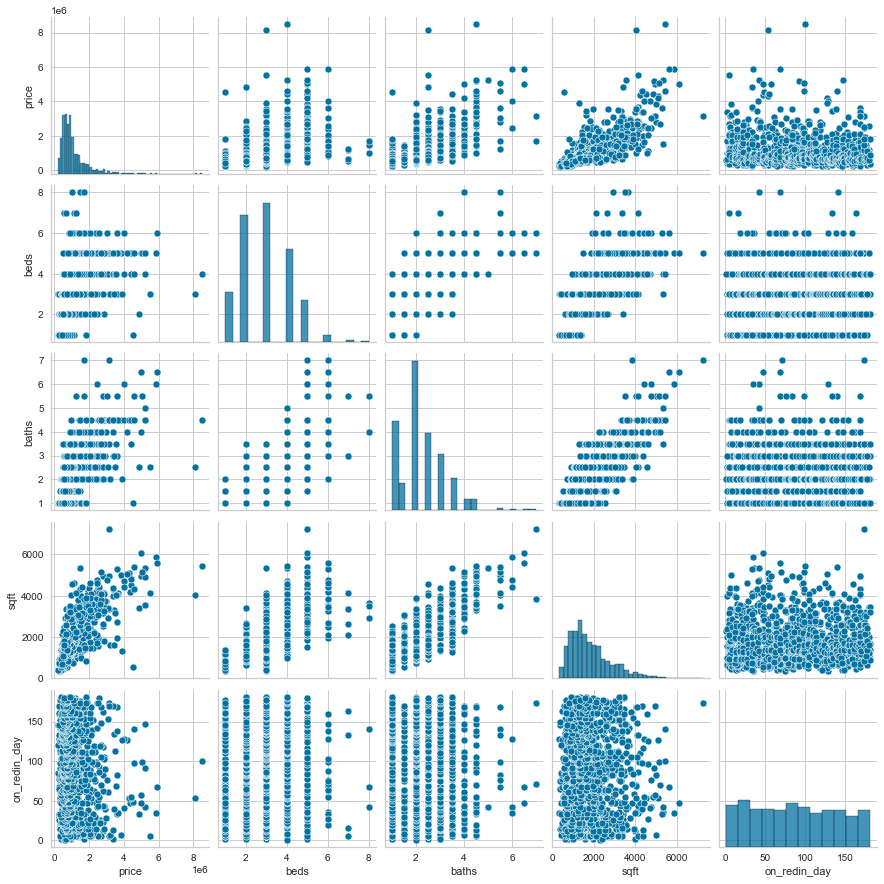

In [528]:
sns.pairplot(df)

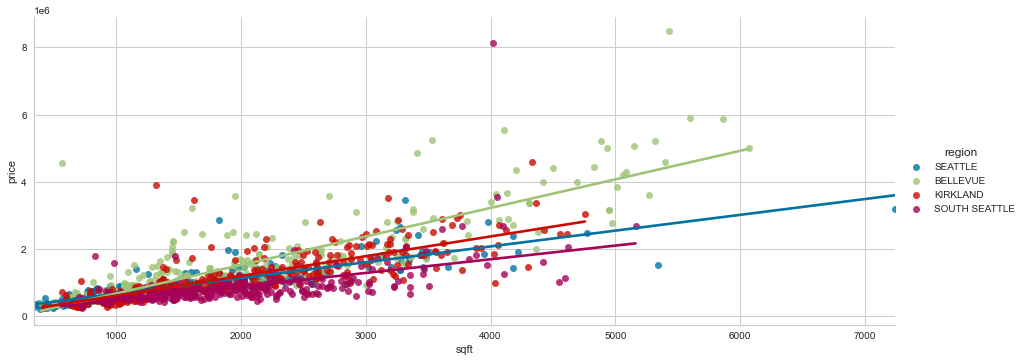

In [476]:
#check if need interaction term 

sns.lmplot(x='sqft', 
           y='price', 
           hue='region', 
           data=df, 
           ci=None,
           height=5, 
           aspect=2.5)

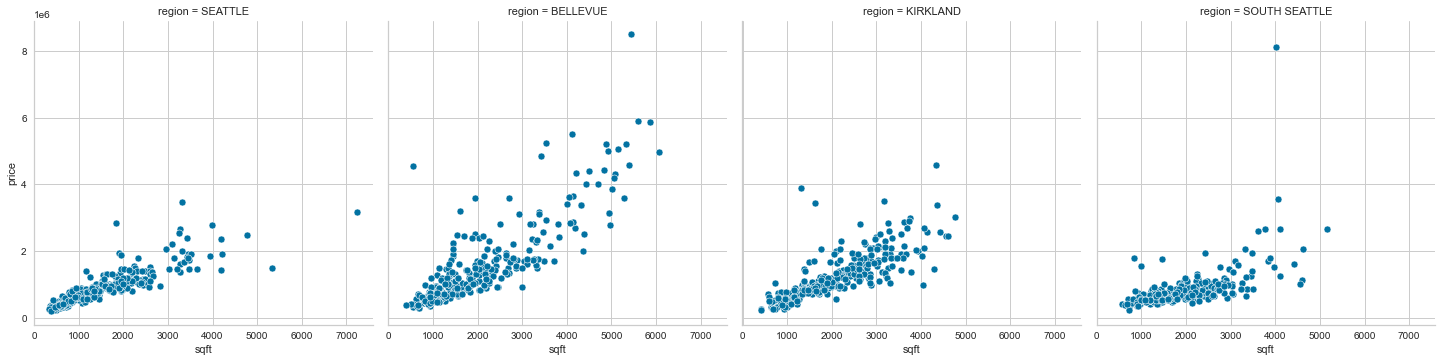

In [477]:
sns.relplot(
    data=df, x="sqft", y="price",
    col="region",
    kind="scatter"
)

In [529]:
# Exclude data with price higher than 8M = outlier
df_small = df[df['price']<8000000]
df_small.dropna(axis='rows')
df_small.shape
#df_small[df_small['price']==0] #zero na price, zero 0 price

(1237, 10)

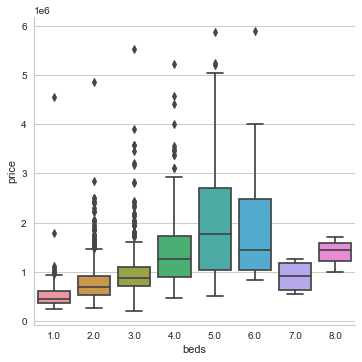

In [479]:
sns.catplot(x='beds',y='price',kind = 'box',data = df_small)

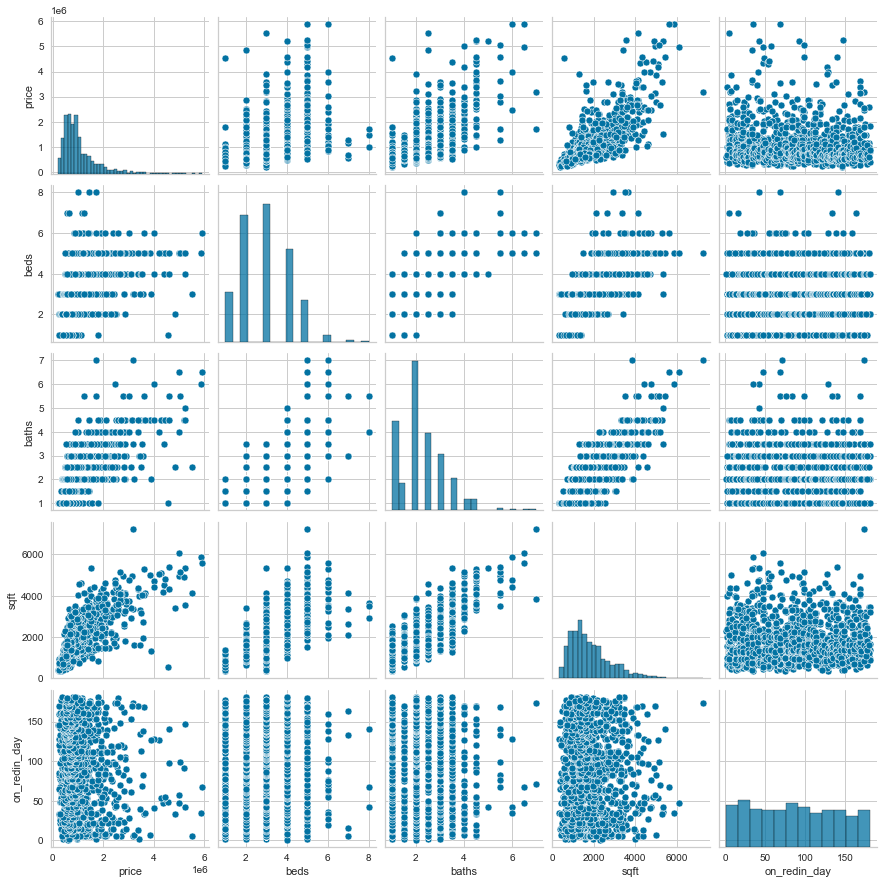

In [533]:
sns.pairplot(df_small)

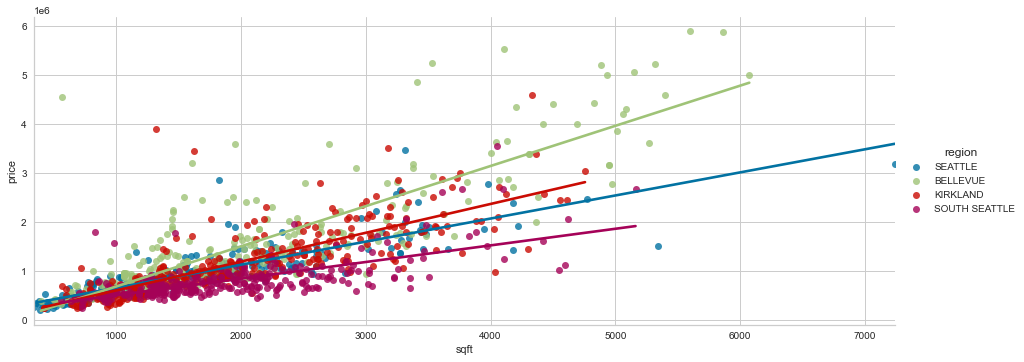

In [480]:
sns.lmplot(x='sqft', 
           y='price', 
           hue = 'region', #see complexity
          # hue='location', #see complexity
           data=df_small, 
           ci=None,
           height=5, 
           aspect=2.5)

In [530]:
#split data 60/20/20
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

def split_and_validate(X, y):

    # perform train/val split
    X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # fit linear regression to training data
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    
    # score fit model on validation data
    train_score = lr_model.score(X_train, y_train)
    val_score = lr_model.score(X_val, y_val)
    
    # report results
    print('\nValidation R^2 score was:', val_score)
    print('Training R^2 score was:', train_score)
    print('Feature coefficient results: \n')
    for feature, coef in zip(X.columns, lr_model.coef_):
        print(feature, ':', f'{coef:.2f}') 
        

## Baseline - Not a good fit

In [534]:
#with just numeric variable
#assigbed X, y on total data 
X= df_small.drop(columns =['price','address','location','list_com','buy_com','region'])
y=df_small['price']
print(y.shape)
print(X.shape)

(1237,)
(1237, 4)


In [535]:
split_and_validate(X,y)
# 48% and overfitting before remove missing location
#63.4% after removing missing location, not overfitting much


Validation R^2 score was: 0.6337870914434605
Training R^2 score was: 0.6366156946964469
Feature coefficient results: 

beds : -183728.43
baths : 142611.09
sqft : 684.12
on_redin_day : -1005.31


In [484]:
y
#X.head()

0        425000
1        395000
2        974000
3       1245000
4        499000
         ...   
1310     715000
1311    1085000
1312     574950
1313     874000
1314    1250000
Name: price, Length: 1237, dtype: int32

## Interaction terms

In [537]:
# Add interaction terms However, there may easily be interaction effects present, in which the impact of one feature may dependent on the current value of a different feature.

#df_small['bed/bath'] = df_small['beds']/df_small['baths']
#df_small['bath*bed'] = df_small['baths']*df_small['beds']

X2= X.copy()

X2['bed/bath'] = X2['beds']/X2['baths']
#X2['bed*bath'] = X2['beds']*X2['baths']

split_and_validate(X2, y)

#Better less overfitting 
#R2 67.3% ['bed/bath'] 67.2% if add both
# 63.5% ['bed*bath']
# 64.5% ['bed*bath'] +['beds']/X2['baths']
#64.2% just X2['beds']/X2['baths']



Validation R^2 score was: 0.6426019730747948
Training R^2 score was: 0.6414514950975981
Feature coefficient results: 

beds : -299179.44
baths : 293780.02
sqft : 678.04
on_redin_day : -973.14
bed/bath : 231762.25


In [538]:
#Take out the two bath and bed columns
X3= X2.copy()
X3=X3.drop(columns = ['beds','baths']) #852
split_and_validate(X3, y)
# drop to 61.3 X2['beds']/X2['baths']
X3.shape 


Validation R^2 score was: 0.6131186966916365
Training R^2 score was: 0.6182288105542371
Feature coefficient results: 

sqft : 622.77
on_redin_day : -1055.36
bed/bath : -188439.86


(1237, 3)

## regularization -Skip next

In [ ]:
# standardize the data dont't think we need to split again 
#X, X_test, y, y_test = train_test_split(X2, y, test_size=0.2, random_state=40)
#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# standardize features
#from sklearn.preprocessing import StandardScaler
#std = StandardScaler()
#std.fit(X_train.values)

## apply the scaler to the train set
#X_tr = std.transform(X_train)

## apply the scaler to the validation set
#X_va = std.transform(X_val)

## Apply the scaler to the test set
#X_te = std.transform(X_test)


In [ ]:
sns.pairplot(df_small) #can try poly on sqft, bath? just these two no everyhitng

In [ ]:
X.head()

In [ ]:
lr = LinearRegression()
lr.fit(X_tr,y_train)
print(lr.score(X_tr,y_train))
print(lr.score(X_va,y_val))

#still overfitting

In [ ]:
# Fit a LASSO model 
from sklearn.linear_model import LassoCV, RidgeCV
lasso = LassoCV()
lasso.fit(X_tr,y_train)
print(lasso.score(X_tr,y_train))
print(lasso.score(X_va,y_val))
#Improve a little bit 67.7%
# C: try ridge - better handling at colineary problem 
#after edit the location fit Lasso again

In [ ]:
#fit Ridge 
from sklearn.linear_model import LassoCV, RidgeCV
Rid = RidgeCV()
Rid.fit(X_tr,y_train)
print(Rid.score(X_tr,y_train))
print(Rid.score(X_va,y_val))
#not seeing too much improvement  

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

# Apply polynomial transformation to val set
X_val_poly = poly.transform(X_val)

# Fit a model using polynomial features
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly,y_train)
print(lr_poly.score(X_train_poly,y_train))
print(lr_poly.score(X_val_poly,y_val))
#worse,  no Polynomial 

In [ ]:
lr_poly.score(X_val_poly, y_val) #more overfit

## Categorical clean up location data


In [539]:
# Categorical clean up location data
df_small['location'] = df_small['location'].replace('Forbes Creek', 'Juanita')
df_small['location'] = df_small['location'].replace('Whittier', 'Ballard')
df_small['location'] = df_small['location'].replace('Glendale', 'South Park')
df_small['location'] = df_small['location'].replace('Rainier Valley', 'Beacon Hill')
df_small['location'] = df_small['location'].replace('Eastlake', 'Capitol Hill')
df_small['location'] = df_small['location'].replace('Robinswood', 'Crossroads')
df_small['location'] = df_small['location'].replace('Wilburton', 'Crossroads')
df_small['location'] = df_small['location'].replace('Holmes Point', 'Juanita')
df_small['location'] = df_small['location'].replace('East Of Market', 'Kirkland')
df_small['location'] = df_small['location'].replace('Phinney Ridge', 'Wallingford')
df_small['location'] = df_small['location'].replace('University District', 'Ravenna')
df_small['location'] = df_small['location'].replace('West Of Market', 'Kirkland')
df_small['location'] = df_small['location'].replace('Totem Lake', 'Juanita')
df_small['location'] = df_small['location'].replace('Central Area', 'Downtown')
df_small['location'] = df_small['location'].replace('Belltown', 'Downtown')
df_small['location'] = df_small['location'].replace('North Rose Hill', 'Juanita')
df_small['location'] = df_small['location'].replace('Kingsgate', 'Juanita')
df_small['location'] = df_small['location'].replace('East Bellevue', 'Crossroads')
df_small['location'] = df_small['location'].replace('Brighton', 'Beacon Hill')
df_small['location'] = df_small['location'].replace('Ravenna', 'Magnolia')
df_small['location'] = df_small['location'].replace('Madison Valley', 'Capitol Hill')
df_small['location'] = df_small['location'].replace('Bryant', 'Magnolia')
df_small['location'] = df_small['location'].replace('Fremont', 'Wallingford')
df_small['location'] = df_small['location'].replace('Rose Hill', 'Kirkland')
df_small['location'] = df_small['location'].replace('Broadway', 'Capitol Hill')

df_small['location'].value_counts()


<ipython-input-539-08b48af3b700>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small['location'] = df_small['location'].replace('Forbes Creek', 'Juanita')
<ipython-input-539-08b48af3b700>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small['location'] = df_small['location'].replace('Whittier', 'Ballard')
<ipython-input-539-08b48af3b700>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

Downtown               149
other                  142
Juanita                115
Beacon Hill            102
Kirkland                65
Capitol Hill            55
Bellevue                54
Queen Anne              45
Seward Park             41
Crossroads              40
Ballard                 40
Magnolia                39
Columbia City           39
Wallingford             34
Seattle                 32
Finn Hill               28
South Park              24
Georgetown              24
Woodridge               22
Lake Hills              21
Hillman City            20
Bridle Trails           19
Upper Rainier Beach     18
West Bellevue           17
Meydenbauer             16
Enatai                  12
Houghton                12
Rainier Beach           12
Name: location, dtype: int64

In [488]:
df_small.head()

,address,location,price,beds,baths,sqft,on_redin_day,list_com,buy_com,region,bath*bed
0,5440 Leary Ave NW #107,Ballard,425000,1.0,1.0,745.0,2.0,Redfin,Lake & Company,SEATTLE,1.0
1,2415 2nd Ave #544,Downtown,395000,1.0,1.0,627.0,2.0,Redfin,COMPASS,SEATTLE,1.0
2,432 30th Ave E,other,974000,3.0,1.5,1560.0,2.0,Redfin,Coldwell Banker Bain,SEATTLE,4.5
3,737 N 66th St,Wallingford,1245000,4.0,2.5,2160.0,5.0,Redfin,Coldwell Banker Danforth,SEATTLE,10.0
4,1708 Melrose Ave #401,Capitol Hill,499000,1.0,1.0,818.0,5.0,Redfin,Columbia Partners Real Estate,SEATTLE,1.0


In [540]:
X3 #1238
y.isna().sum()

0

## Convert treate]ed location to dummy variable

In [541]:
X4 = X3.copy()
# add cleaned location data as summy variable
X4['location'] = df_small['location']

split_and_validate(pd.get_dummies(X4, drop_first=True), y)

#R^2 increased to 70%, still overfitting , overfitting increased  #C: region might be too general, location is to specific 
#Increase to 68.5% after adding location as dummy
#overfitting


Validation R^2 score was: 0.685707497303313
Training R^2 score was: 0.7121572289946883
Feature coefficient results: 

sqft : 625.73
on_redin_day : -431.33
bed/bath : -75855.75
location_Beacon Hill : -343304.44
location_Bellevue : 44965.72
location_Bridle Trails : 87016.69
location_Capitol Hill : 41518.17
location_Columbia City : -123049.22
location_Crossroads : 2671.74
location_Downtown : 316417.75
location_Enatai : 954155.31
location_Finn Hill : -143615.67
location_Georgetown : -195469.55
location_Hillman City : -351673.87
location_Houghton : 271263.54
location_Juanita : -53852.50
location_Kirkland : -90829.63
location_Lake Hills : -54605.65
location_Magnolia : -333394.51
location_Meydenbauer : 873160.38
location_Queen Anne : -14477.18
location_Rainier Beach : -237036.28
location_Seattle : -140026.56
location_Seward Park : -309757.96
location_South Park : -235736.60
location_Upper Rainier Beach : -501258.78
location_Wallingford : -53463.64
location_West Bellevue : 700033.53
location_

In [491]:
X4

,sqft,on_redin_day,bed*bath,location
0,745.0,2.0,1.0,Ballard
1,627.0,2.0,1.0,Downtown
2,1560.0,2.0,4.5,other
3,2160.0,5.0,10.0,Wallingford
4,818.0,5.0,1.0,Capitol Hill
...,...,...,...,...
1310,1366.0,177.0,9.0,Beacon Hill
1311,2430.0,177.0,9.0,Seward Park
1312,1596.0,180.0,10.0,Seattle
1313,3223.0,181.0,14.0,Beacon Hill


In [542]:
# just add region, not as good as location, will use location 
X5 = X3.copy()

X5['region'] = df_small['region']
split_and_validate(pd.get_dummies(X5, drop_first=True), y)

#R^2 increased to 75.1%, underfitting


Validation R^2 score was: 0.6487725797708521
Training R^2 score was: 0.681027965862406
Feature coefficient results: 

sqft : 618.62
on_redin_day : -760.37
bed/bath : -79951.52
region_KIRKLAND : -308803.07
region_SEATTLE : -328834.16
region_SOUTH SEATTLE : -602032.84


## How mych does one sqft derive from its region? 

In [544]:
def add_deviation_feature(X, feature, category):
    
    # temp groupby object
    category_gb = X.groupby(category)[feature]
    
    # create columns of category means and standard deviations
    category_mean = category_gb.transform(lambda x: x.mean())
    category_std = category_gb.transform(lambda x: x.std())
    
    # compute stds from category mean for each feature value,
    # add to X as new feature
    deviation_feature = (X[feature] - category_mean) / category_std 
    X[feature + '_Dev_' + category] = deviation_feature  

In [545]:
X6 = X4.copy()
X6['region'] = df_small['region']
add_deviation_feature(X6, 'sqft', 'region')
X6 =pd.get_dummies(X6)
split_and_validate(pd.get_dummies(X6), y)
#split_and_validate(pd.get_dummies(X6), y)
#R2 increase by 2%
# plot residuals, pick something that's very off, pick something that's accurate, why is it more expensive
#73.7% another 10% up, overfitting 


Validation R^2 score was: 0.7371141850301102
Training R^2 score was: 0.7853559577450344
Feature coefficient results: 

sqft : 2004.40
on_redin_day : -378.03
bed/bath : -55885.68
sqft_Dev_region : -1368723.10
location_Ballard : 182364.43
location_Beacon Hill : -120436.39
location_Bellevue : -200598.92
location_Bridle Trails : -7156.81
location_Capitol Hill : 183138.18
location_Columbia City : 26773.39
location_Crossroads : -200309.43
location_Downtown : 289269.55
location_Enatai : 189119.78
location_Finn Hill : -120798.44
location_Georgetown : -85137.47
location_Hillman City : -76317.73
location_Houghton : 294907.42
location_Juanita : -25288.50
location_Kirkland : -58857.25
location_Lake Hills : -465498.30
location_Magnolia : -12163.11
location_Meydenbauer : 411608.85
location_Queen Anne : 152774.47
location_Rainier Beach : -101391.11
location_Seattle : 62521.69
location_Seward Park : 62120.60
location_South Park : -403620.90
location_Upper Rainier Beach : -186809.03
location_Wallingfo

In [379]:
y

0        425000
1        395000
2        974000
3        499000
4       1530000
         ...   
1309    1085000
1310     715000
1311     574950
1312     874000
1313    1250000
Name: price, Length: 1237, dtype: int32

In [496]:
X4

,sqft,on_redin_day,bed*bath,location
0,745.0,2.0,1.0,Ballard
1,627.0,2.0,1.0,Downtown
2,1560.0,2.0,4.5,other
3,2160.0,5.0,10.0,Wallingford
4,818.0,5.0,1.0,Capitol Hill
...,...,...,...,...
1310,1366.0,177.0,9.0,Beacon Hill
1311,2430.0,177.0,9.0,Seward Park
1312,1596.0,180.0,10.0,Seattle
1313,3223.0,181.0,14.0,Beacon Hill


In [497]:
# derive according to location , no region derive
X7 = X4.copy()
X7['location'] = df_small['location']
add_deviation_feature(X7, 'sqft', 'location')
X7 =pd.get_dummies(X7)
split_and_validate(pd.get_dummies(X7), y)
#split_and_validate(pd.get_dummies(X6), y)
#R2 increase by 2%
# plot residuals, pick something that's very off, pick something that's accurate, why is it more expensive
#region is better use region


Validation R^2 score was: 0.6937438419837867
Training R^2 score was: 0.7251773409376228
Feature coefficient results: 

sqft : 1048.94
on_redin_day : -330.51
bed*bath : -6594.84
sqft_Dev_location : -375865.70
location_Ballard : 197927.35
location_Beacon Hill : -342659.34
location_Bellevue : 137788.17
location_Bridle Trails : -115336.84
location_Capitol Hill : 337632.12
location_Columbia City : 17449.23
location_Crossroads : 70597.11
location_Downtown : 589866.94
location_Enatai : 264691.46
location_Finn Hill : -204261.10
location_Georgetown : 24266.01
location_Hillman City : -297178.70
location_Houghton : 255762.76
location_Juanita : -61568.77
location_Kirkland : -146137.95
location_Lake Hills : -178872.23
location_Magnolia : -560806.00
location_Meydenbauer : 684506.28
location_Queen Anne : 255553.51
location_Rainier Beach : -232380.56
location_Seattle : -25544.45
location_Seward Park : -475411.04
location_South Park : -417317.59
location_Upper Rainier Beach : -520366.98
location_Walli

In [512]:
#take out on redfin days
X8 = X6.copy()
X8= X6.drop(columns=['on_redin_day'])

split_and_validate((X8), y)

#73.08% another 10% up, overfitting 


Validation R^2 score was: 0.7308189957921571
Training R^2 score was: 0.7847941380510209
Feature coefficient results: 

sqft : 2057.34
bed*bath : -8394.63
sqft_Dev_region : -1377234.85
location_Ballard : 182187.62
location_Beacon Hill : -115738.10
location_Bellevue : -184292.07
location_Bridle Trails : -14557.23
location_Capitol Hill : 183344.53
location_Columbia City : 55982.97
location_Crossroads : -201610.88
location_Downtown : 297248.53
location_Enatai : 187696.70
location_Finn Hill : -147906.79
location_Georgetown : -70143.47
location_Hillman City : -68191.64
location_Houghton : 284925.46
location_Juanita : -35641.06
location_Kirkland : -70002.37
location_Lake Hills : -464789.09
location_Magnolia : -25948.02
location_Meydenbauer : 427006.90
location_Queen Anne : 158463.62
location_Rainier Beach : -127147.41
location_Seattle : 86977.23
location_Seward Park : 61724.57
location_South Park : -430830.90
location_Upper Rainier Beach : -173125.88
location_Wallingford : 122364.87
location

In [511]:
X8

,sqft,bed*bath,sqft_Dev_region,location_Ballard,location_Beacon Hill,location_Bellevue,location_Bridle Trails,location_Capitol Hill,location_Columbia City,location_Crossroads,...,location_South Park,location_Upper Rainier Beach,location_Wallingford,location_West Bellevue,location_Woodridge,location_other,region_BELLEVUE,region_KIRKLAND,region_SEATTLE,region_SOUTH SEATTLE
0,745.0,1.0,-0.859683,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,627.0,1.0,-0.988854,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1560.0,4.5,0.032472,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,2160.0,10.0,0.689273,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,818.0,1.0,-0.779772,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1310,1366.0,9.0,-0.648368,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1311,2430.0,9.0,0.668467,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1312,1596.0,10.0,-0.363713,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1313,3223.0,14.0,1.649905,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [513]:
# now run lasso again  train on 80% data 
#reload X from X6 
# standardize the data
X_train, X_test, y_train, y_test = train_test_split(X8, y, test_size=0.2, random_state=40)
#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [514]:


# standardize features
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(X_train.values)

## apply the scaler to the train set
X_tr = std.transform(X_train)

## apply the scaler to the validation set
#X_va = std.transform(X_val)

## Apply the scaler to the test set
X_te = std.transform(X_test)


# Fit a LASSO model 
from sklearn.linear_model import LassoCV, RidgeCV
lasso = LassoCV()
lasso.fit(X_tr,y_train)
print(lasso.score(X_tr,y_train))
print(lasso.score(X_te,y_test))
#Improve a little bit 67.7%
# C: try ridge - better handling at colineary problem 
#after edit the location fit Lasso again
#73.3% test | 78% training

0.7797932775526792
0.732869790849684


In [515]:
result = pd.DataFrame()
result['y_test']=y_test
result.head()

,y_test
223,831000
881,629000
705,2400000
815,900000
1072,820000


In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

rf = RandomForestRegressor(n_estimators=2000, max_features=3, max_depth=5)
rf.fit(X_tr, y_train)
y_pred = rf.predict(X_val)
print("Random Forest Regression:", r2_score(y_val, y_pred))

gbm = GradientBoostingRegressor(n_estimators=500, max_depth=3, learning_rate=.01)
gbm.fit(X_train, y_train)
y_pred = gbm.predict(X_holdout)
print("Gradient Boosted Regression:", r2_score(y_holdout, y_pred))

In [516]:
#fit Ridge 
from sklearn.linear_model import LassoCV, RidgeCV
Rid = RidgeCV()
Rid.fit(X_tr,y_train)
print(Rid.score(X_tr,y_train))
print(Rid.score(X_te,y_test))
#Lasso slightly better 

0.78003679082463
0.7303025067101679


In [517]:
#Predict using lasso

# define new data
#X_te
# make a prediction
y_predict = lasso.predict(X_te)
# summarize prediction
#print(y_predict)
res= y_test-y_predict

result['y_predict']= y_predict
result['res']= res
result

#result.append(X_test)


,y_test,y_predict,res
223,831000,8.556672e+05,-24667.182515
881,629000,6.249212e+05,4078.771712
705,2400000,1.978530e+06,421470.050637
815,900000,9.196471e+05,-19647.113103
1072,820000,1.148593e+06,-328593.103182
...,...,...,...
839,1875000,1.657067e+06,217933.003131
71,840000,6.343366e+05,205663.376686
522,5050000,4.347794e+06,702205.784936
712,995000,1.120699e+06,-125698.923656


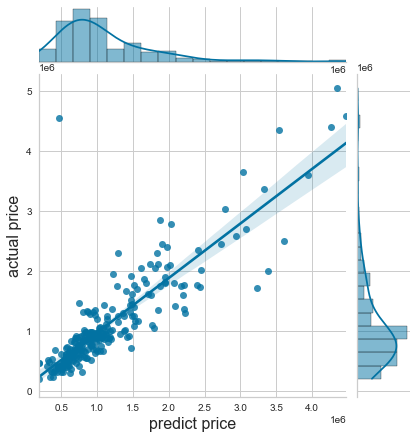

In [553]:
#plot residual

h=sns.jointplot(x=y_predict, y=y_test, kind='reg')
h.set_axis_labels('predict price', 'actual price', fontsize=16)


C:\Users\wangz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


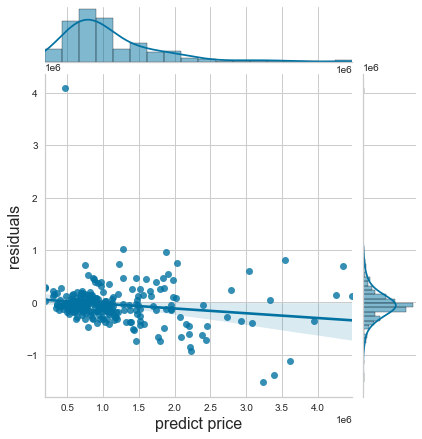

In [556]:
r=sns.jointplot(y_predict , res, kind='reg')
r.set_axis_labels('predict price', 'residuals', fontsize=16)


In [507]:
#max error
df_small[df_small['price'] == 4550000]

,address,location,price,beds,baths,sqft,on_redin_day,list_com,buy_com,region,bath*bed
431,9552 Lake Washington Blvd NE,other,4550000,1.0,1.0,560.0,48.0,COMPASS,Haleh Clapp,BELLEVUE,1.0


In [520]:
result[result['res'] ==max(res)]

,y_test,y_predict,res
431,4550000,466737.463015,4.083263e+06


In [521]:
(result[result['res'] <1] )

,y_test,y_predict,res
223,831000,8.556672e+05,-24667.182515
815,900000,9.196471e+05,-19647.113103
1072,820000,1.148593e+06,-328593.103182
788,769000,7.868019e+05,-17801.909722
446,903000,1.066590e+06,-163590.027027
...,...,...,...
1309,565500,7.640075e+05,-198507.541081
145,629950,7.381655e+05,-108215.513370
1183,950000,1.322421e+06,-372420.525661
712,995000,1.120699e+06,-125698.923656


In [524]:
 (result[result['res'] >-1]).sort_values(by=['res'])

,y_test,y_predict,res
881,629000,6.249212e+05,4.078772e+03
1143,575000,5.683688e+05,6.631162e+03
1254,749990,7.412032e+05,8.786823e+03
581,866000,8.567939e+05,9.206058e+03
639,750000,7.406633e+05,9.336711e+03
...,...,...,...
28,2780000,2.033487e+06,7.465129e+05
428,4350000,3.542805e+06,8.071952e+05
855,2852000,1.882097e+06,9.699030e+05
808,2300000,1.284609e+06,1.015391e+06


In [523]:
df_small[df_small['price'] == 629000] # predict 624912
13331 NE 137th Pl	

,address,location,price,beds,baths,sqft,on_redin_day,list_com,buy_com,region,bath*bed
881,13331 NE 137th Pl,Juanita,629000,2.0,2.0,1140.0,120.0,Windermere Real Estate/PSR Inc,Heather Maddox,KIRKLAND,4.0


In [526]:
df_small[df_small['price'] == 575000] # predict 56368 
7152 E Beacon Ave S #34

,address,location,price,beds,baths,sqft,on_redin_day,list_com,buy_com,region,bath*bed
321,415 W Mercer St #501,Queen Anne,575000,2.0,1.0,1188.0,176.0,Redfin Corp.,Elite Properties,SEATTLE,2.0
1041,3318 S Mead St,Seattle,575000,3.0,1.5,1390.0,29.0,The Preview Group,missing,SOUTH SEATTLE,4.5
1055,4828 S Holden St,Beacon Hill,575000,3.0,2.0,1250.0,37.0,Redfin Corp.,missing,SOUTH SEATTLE,6.0
1143,7152 E Beacon Ave S #34,Beacon Hill,575000,3.0,2.0,1325.0,85.0,BMC Realty Advisors Inc,Windermere Real Estate M2 LLC,SOUTH SEATTLE,6.0
1144,7150 B Beacon Ave S #42,Beacon Hill,575000,2.0,1.5,1376.0,85.0,BMC Realty Advisors Inc,Keller Williams Eastside,SOUTH SEATTLE,3.0


NameError: name 'fit' is not defined

## Scaler the numberic input